<a href="https://colab.research.google.com/github/foofoofoo97/intelligence_kuih_muih_recognition_system/blob/main/model_2_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image 
from numpy import asarray 
from tensorflow.keras.preprocessing import image_dataset_from_directory
print(tf.__version__)

2.4.1


In [ ]:
# mount google drive locally
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
(180, 180, 3)


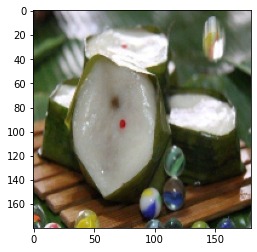

In [ ]:
# initialization
train_images = []
train_label = []
Files = ['Yi Bua','Onde Onde', 'Kuih Ketayap','Biskut Kelapa']
label_val = 0

# get the directory of collected images for each kuih type (kelapa)
# and its labels for training
import cv2
from PIL import Image

for files in Files:
    cpath = os.path.join('/content/drive/MyDrive/422_Asgn/train', files)
    for img in os.listdir(cpath):
        image_array = cv2.cvtColor(cv2.imread(os.path.join(cpath, img)), cv2.COLOR_BGR2RGB)
        image_array = cv2.resize(image_array, (180, 180))
        train_images.append(image_array)
        train_label.append(label_val)
    label_val = label_val+1

print(train_label)
print(train_images[0].shape)
plt.imshow(train_images[0])
imgplot = plt.imshow(train_images[0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
(180, 180, 3)


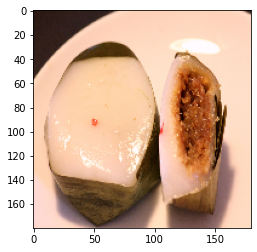

In [ ]:
# initialization
test_images = []
test_label = []
Files = ['Yi Bua','Onde Onde', 'Kuih Ketayap','Biskut Kelapa']
label_val = 0

# get the directory of collected images for each kuih type (kelapa)
# and its labels for testing
import cv2
from PIL import Image

for files in Files:
    cpath = os.path.join('/content/drive/MyDrive/422_Asgn/test', files)
    for img in os.listdir(cpath):
        image_array = cv2.cvtColor(cv2.imread(os.path.join(cpath, img)), cv2.COLOR_BGR2RGB)
        image_array = cv2.resize(image_array, (180, 180))
        test_images.append(image_array)
        test_label.append(label_val)
    label_val = label_val+1

print(test_label)
print(test_images[0].shape)
plt.imshow(test_images[0])
imgplot = plt.imshow(test_images[0])

In [ ]:
# training image data exploration

# convert to np array for training image dataset
train_arrays = np.array(train_images)

In [ ]:
# convert training image dataset labels to np array
train_label = np.array(train_label)
train_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
# view the shape of training data array
train_arrays.shape

(198, 180, 180, 3)

In [ ]:
# convert to np array for testing image dataset labels
test_label = np.array(test_label)
test_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3])

In [ ]:
# convert to np array for testing image dataset
test_arrays = np.array(test_images)

In [ ]:
# view the shape of testing data array
test_arrays.shape

(48, 180, 180, 3)

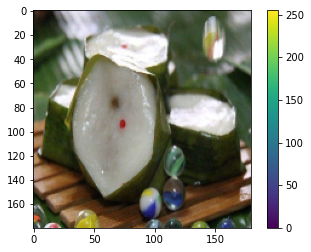

In [ ]:
# data preprocessing
plt.figure()
plt.imshow(train_arrays[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# scale the values to a range of 0 to 1
train_arrays = train_arrays / 255.0
test_arrays = test_arrays / 255.0

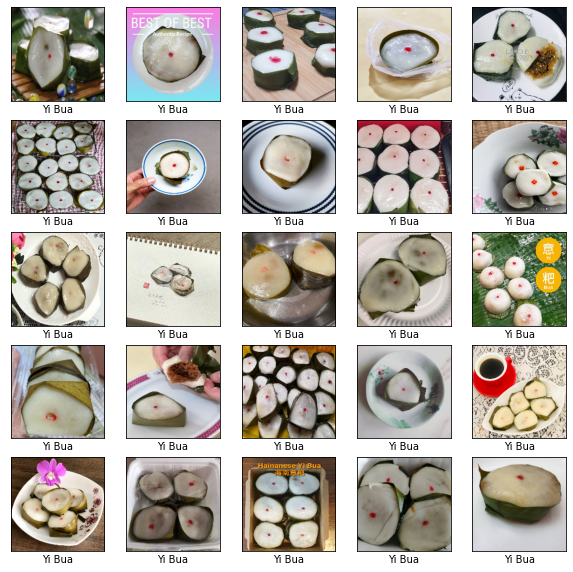

In [ ]:
# verify image dataset is in correct format
class_names = ['Yi Bua','Onde Onde', 'Kuih Ketayap','Biskut Kelapa']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_arrays[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_label[i]])
plt.show()

In [ ]:
# designing the model with 4 layers
# output layer with 4 classes indicating 4 types of kuih kelapa
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(180,180,3)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4)
])

In [ ]:
# compile the model with adam optimizer
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# train the model with 50 epochs of training image dataset
# and validate using 10% of the training image dataset
epochs = 50
model2 = model.fit(train_arrays, train_label, validation_split=0.1, epochs=epochs, batch_size=10, verbose=1, shuffle=1)

Epoch 1/50
18/18 [==============================] - 4s 56ms/step - loss: 38.0896 - accuracy: 0.2993 - val_loss: 7.2893e-06 - val_accuracy: 1.0000
Epoch 2/50
18/18 [==============================] - 0s 20ms/step - loss: 12.4203 - accuracy: 0.3558 - val_loss: 14.1964 - val_accuracy: 0.0500
Epoch 3/50
18/18 [==============================] - 0s 18ms/step - loss: 11.1472 - accuracy: 0.3826 - val_loss: 10.2372 - val_accuracy: 0.0500
Epoch 4/50
18/18 [==============================] - 0s 17ms/step - loss: 3.5866 - accuracy: 0.5360 - val_loss: 4.3733 - val_accuracy: 0.2500
Epoch 5/50
18/18 [==============================] - 0s 17ms/step - loss: 5.5281 - accuracy: 0.5199 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 6/50
18/18 [==============================] - 0s 16ms/step - loss: 3.7120 - accuracy: 0.5538 - val_loss: 8.4226 - val_accuracy: 0.0500
Epoch 7/50
18/18 [==============================] - 0s 17ms/step - loss: 2.1488 - accuracy: 0.6147 - val_loss: 9.6000 - val_accuracy: 0.0000e+00


In [ ]:
# test the model and view the accuracy
test_loss, test_acc = model.evaluate(test_arrays,  test_label, verbose=2)
print('\nTest accuracy:', test_acc)

2/2 - 0s - loss: 1.8586 - accuracy: 0.6667

Test accuracy: 0.6666666865348816


In [ ]:
# create prediction model based on the tested model
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_arrays)

In [ ]:
# predict the label for each image in the testing set
predictions[0]

array([9.8176277e-01, 2.2365558e-03, 4.6108271e-06, 1.5996084e-02],
      dtype=float32)

In [ ]:
# gets the label with the highest confidence value
np.argmax(predictions[0])

0

In [ ]:
# view the actual label of the image
test_label[0]

0

In [ ]:
# view the predicted image to verify the prediction model
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# view the predicted label to verify the prediction model
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(4), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

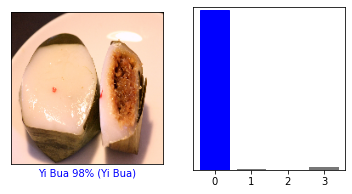

In [ ]:
# view the predicted image and its predicted label
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_label, test_arrays)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_label)
plt.show()

In [ ]:
# gets an image from the testing image dataset
img = test_arrays[1]
print(img.shape)

(180, 180, 3)


In [ ]:
# adds the image to a batch where it is the only member
img = (np.expand_dims(img,0))
print(img.shape)

(1, 180, 180, 3)


In [ ]:
# predict the correct label for the image
predictions_single = probability_model.predict(img)
print(predictions_single)

[[1.9853835e-06 9.9978763e-01 2.1036870e-04 2.4427746e-11]]


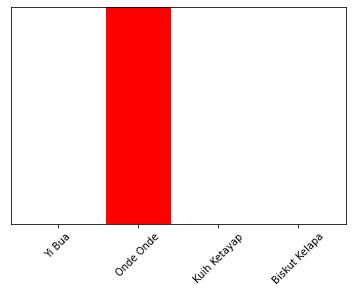

In [ ]:
# view the predicted label for the image
plot_value_array(1, predictions_single[0], test_label)
_ = plt.xticks(range(4), class_names, rotation=45)

In [ ]:
# gets the label with the highest confidence value
np.argmax(predictions_single[0])

1

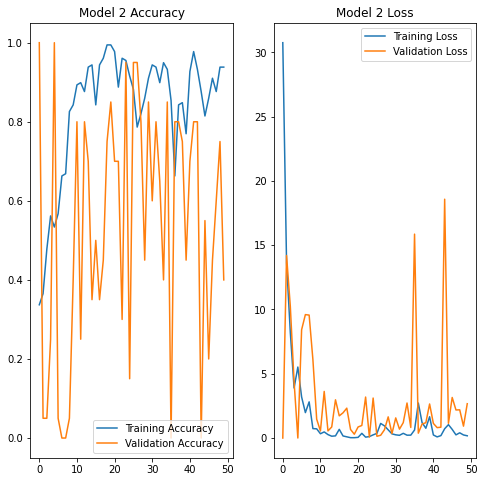

In [ ]:
# to visualize the results of training the model
acc = model2.history['accuracy']
val_acc = model2.history['val_accuracy']

loss = model2.history['loss']
val_loss = model2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Model 2 Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Model 2 Loss')
plt.show()